In [5]:
# Given "Adult" dataset, which predicts whether income exceeds $50K/yr based on census data.

In [6]:
#1. Data Exploration and Preprocessing

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder,OneHotEncoder
from sklearn.ensemble import IsolationForest
import seaborn as sns


In [8]:
df = pd.read_csv('adult_with_headers.csv')

In [9]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [10]:
# Summary statistics
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
# Check for null values
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


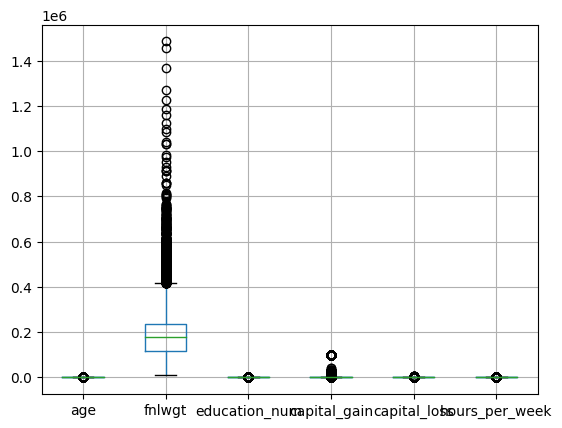

In [12]:
df.boxplot()
plt.show()

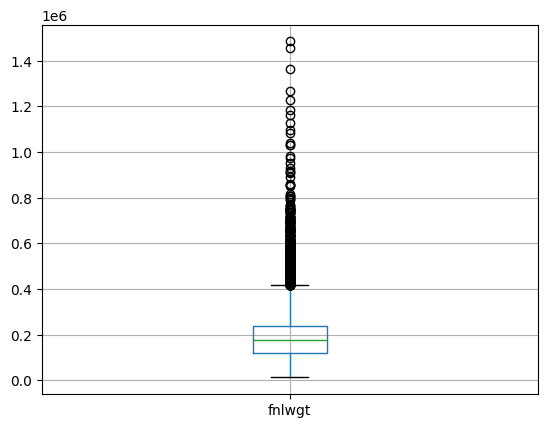

In [13]:
df.boxplot('fnlwgt')
plt.show()

In [14]:
# identify and remove outliers

In [15]:
#Q1=df['fnlwgt'].quantile(0.25)
#Q3=df['fnlwgt'].quantile(0.75)
#IQR=Q3-Q1
#print(Q1,Q3,IQR)

In [16]:
#lower_extreme=Q1-1.5*IQR
#upper_extreme=Q3+1.5*IQR
#print(lower_extreme,upper_extreme)

In [17]:
#df=df[(df['fnlwgt']<lower_extreme) | (df['fnlwgt']>upper_extreme)]
#df

In [18]:
# Separate numerical and categorical columns
num_col = [i for i in df.columns if df[i].dtype!='O']
cat_col = [i for i in df.columns if df[i].dtype=='O']

In [19]:
num_col

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [20]:
cat_col

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [21]:
# Scaling numerical features

In [22]:
# Standard Scaling
std_sca = StandardScaler()
df_std_sca = df.copy()
df_std_sca[num_col] = std_sca.fit_transform(df[num_col])
df_std_sca[num_col]

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429
...,...,...,...,...,...,...
32556,-0.849080,0.639741,0.746039,-0.145920,-0.21666,-0.197409
32557,0.103983,-0.335433,-0.420060,-0.145920,-0.21666,-0.035429
32558,1.423610,-0.358777,-0.420060,-0.145920,-0.21666,-0.035429
32559,-1.215643,0.110960,-0.420060,-0.145920,-0.21666,-1.655225


In [23]:
# Min-Max Scaling
minmax_sca = MinMaxScaler()
df_minmax_sca = df.copy()
df_minmax_sca[num_col]= minmax_sca.fit_transform(df[num_col])
df_minmax_sca[num_col]

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.301370,0.044302,0.800000,0.021740,0.0,0.397959
1,0.452055,0.048238,0.800000,0.000000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.000000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.000000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.000000,0.0,0.397959
...,...,...,...,...,...,...
32556,0.136986,0.166404,0.733333,0.000000,0.0,0.377551
32557,0.315068,0.096500,0.533333,0.000000,0.0,0.397959
32558,0.561644,0.094827,0.533333,0.000000,0.0,0.397959
32559,0.068493,0.128499,0.533333,0.000000,0.0,0.193878


In [24]:
# Standard Scaling is preferred when data is normally distributed, as it centers the data.
# Min-Max Scaling is ideal when preserving the range of data.

In [25]:
#Standard Scaling is preferred when data has a normal distribution, as it transforms the data to have a mean of 0 and a standard deviation of 1.
#Min-Max Scaling is useful when features are not normally distributed or for algorithms sensitive to the scale of data, such as neural networks.

In [26]:
# 2. Encoding Techniques:

In [27]:
one_hot=OneHotEncoder()

In [28]:
# Apply One-Hot Encoding to categorical variables with less than 5 categories
cat_cols = [col for col in df.select_dtypes(include=['object']).columns if df[col].nunique() < 5]
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,income_ >50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,2174,0,40,United-States,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,13,United-States,1,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,40,United-States,1,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,40,United-States,1,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,40,Cuba,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,0,0,38,United-States,0,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,0,0,40,United-States,1,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,0,0,40,United-States,0,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,0,0,20,United-States,1,0


In [29]:
# Apply Label Encoding to categorical variables with more than 5 categories
label_encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    if df[col].nunique() >= 5:
        df[col] = label_encoder.fit_transform(df[col])
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,income_ >50K
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,1,0
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,1,0
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,1,0
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,1,0
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,38,39,0,0
32557,40,4,154374,11,9,2,7,0,4,0,0,40,39,1,1
32558,58,4,151910,11,9,6,1,4,4,0,0,40,39,0,0
32559,22,4,201490,11,9,4,1,3,4,0,0,20,39,1,0


In [30]:
# Discuss the pros and cons of One-Hot Encoding and Label Encoding.
##1. One-Hot Encoding

#Pros:

#No Ordinal Relationship Assumed: One-Hot Encoding treats each category as separate, making it ideal for categorical variables without any inherent order (e.g., colors, countries).

# Suitable for Many Algorithms: It works well with algorithms that don’t handle categorical data directly, like linear regression, logistic regression, and many tree-based models.

#Avoids Numerical Misinterpretation: By representing categories as binary values, it prevents the model from assuming a false ordinal relationship among categories.

#Cons:

#High Dimensionality: One-Hot Encoding can lead to high-dimensional data, especially with categorical variables with many levels. This may result in higher memory usage and can lead to the curse of dimensionality, potentially reducing model performance.

#Sparse Matrices: It creates sparse matrices (many 0s) which can increase computational costs and slow down training.

#Less Practical for High Cardinality: When there are many unique categories, like zip codes or user IDs, One-Hot Encoding becomes impractical and inefficient.
#2. Label Encoding

#Pros:

#Simplicity and Efficiency: Label Encoding is straightforward and efficient, converting categories to integers without increasing dimensionality.

#Low Memory Usage: Since no new columns are created, Label Encoding doesn’t increase the data size, making it more memory-efficient.

#Useful for Ordinal Data: For data with a natural order (e.g., low, medium, high), Label Encoding can preserve this ordering, which may improve model performance in some cases.

#Cons:

#Introduces Ordinal Relationships: Label Encoding assigns an integer value to each category, implying a ranking or order that might not actually exist. This can mislead the model, especially with algorithms like linear or logistic regression that assume numerical relationships.

#Not Suitable for Unordered Categories: For nominal data with no inherent order (e.g., colors), Label Encoding can introduce bias by implying that one category is “larger” than another.

#Limited Compatibility: Many models, like linear regression, struggle with label-encoded categorical data, as they can misinterpret category values as continuous variables.#

In [31]:
# 3. Feature Engineering:

In [32]:
# Feature 1: Education Level Category based on education_num
def education_level(education_num):
    if education_num <= 8:
        return 'Low'
    elif 9 <= education_num <= 12:
        return 'Medium'
    else:
        return 'High'

df['education_level'] = df['education_num'].apply(education_level)
df[['education_level']]

,education_level
0,High
1,High
2,Medium
3,Low
4,High
...,...
32556,Medium
32557,Medium
32558,Medium
32559,Medium


In [33]:
# Feature 2: Family Workload based on relationship and hours_per_week
def family_workload(row):
    if row['relationship'] in ['Husband', 'Wife', 'Own-child'] and row['hours_per_week'] >= 40:
        return 'High Workload'
    elif row['relationship'] in ['Husband', 'Wife', 'Own-child'] and row['hours_per_week'] < 40:
        return 'Moderate Workload'
    else:
        return 'Low Workload'

df['family_workload'] = df.apply(family_workload, axis=1)
df[['family_workload']]

,family_workload
0,Low Workload
1,Low Workload
2,Low Workload
3,Low Workload
4,Low Workload
...,...
32556,Low Workload
32557,Low Workload
32558,Low Workload
32559,Low Workload


In [34]:
#Rationale:

# Education Level: Simplifies the education_num feature into categories that may provide stronger predictive value and are less sensitive to small variations in educational years.

# Family Workload: Combines family responsibilities (relationship status) and working hours, potentially revealing insights into how work-life balance impacts income.

In [35]:
# apply log transformation to at least one skewed numerical feature

In [36]:
df['capital_gain_log'] = np.log1p(df['capital_gain'])
df['capital_gain_log']

,capital_gain_log
0,7.684784
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
32556,0.000000
32557,0.000000
32558,0.000000
32559,0.000000


In [37]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,income_ >50K,education_level,family_workload,capital_gain_log
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,1,0,High,Low Workload,7.684784
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,1,0,High,Low Workload,0.000000
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,1,0,Medium,Low Workload,0.000000
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,1,0,Low,Low Workload,0.000000
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,0,0,High,Low Workload,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,38,39,0,0,Medium,Low Workload,0.000000
32557,40,4,154374,11,9,2,7,0,4,0,0,40,39,1,1,Medium,Low Workload,0.000000
32558,58,4,151910,11,9,6,1,4,4,0,0,40,39,0,0,Medium,Low Workload,0.000000
32559,22,4,201490,11,9,4,1,3,4,0,0,20,39,1,0,Medium,Low Workload,0.000000


In [38]:
# Convert categorical columns to numeric
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])

In [39]:
# Isolation Forest

In [40]:
from sklearn.ensemble import IsolationForest

In [41]:
iso=IsolationForest(n_estimators=50,contamination=0.1)

In [42]:
iso.fit(df)

IsolationForest(contamination=0.1, n_estimators=50)

In [43]:
pred=iso.predict(df)

In [44]:
pred

array([ 1,  1,  1, ...,  1,  1, -1])

In [45]:
index=np.where(pred<0)
index

(array([    4,     8,    11, ..., 32538, 32548, 32560]),)

In [46]:
x=df.values
x

array([[3.90000000e+01, 7.00000000e+00, 7.75160000e+04, ...,
        0.00000000e+00, 0.00000000e+00, 7.68478394e+00],
       [5.00000000e+01, 6.00000000e+00, 8.33110000e+04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.80000000e+01, 4.00000000e+00, 2.15646000e+05, ...,
        2.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [5.80000000e+01, 4.00000000e+00, 1.51910000e+05, ...,
        2.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.20000000e+01, 4.00000000e+00, 2.01490000e+05, ...,
        2.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.20000000e+01, 5.00000000e+00, 2.87927000e+05, ...,
        2.00000000e+00, 0.00000000e+00, 9.61747076e+00]])

In [47]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,income_ >50K,education_level,family_workload,capital_gain_log
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,1,0,0,0,7.684784
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,1,0,0,0,0.000000
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,1,0,2,0,0.000000
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,1,0,1,0,0.000000
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,0,0,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,38,39,0,0,2,0,0.000000
32557,40,4,154374,11,9,2,7,0,4,0,0,40,39,1,1,2,0,0.000000
32558,58,4,151910,11,9,6,1,4,4,0,0,40,39,0,0,2,0,0.000000
32559,22,4,201490,11,9,4,1,3,4,0,0,20,39,1,0,2,0,0.000000


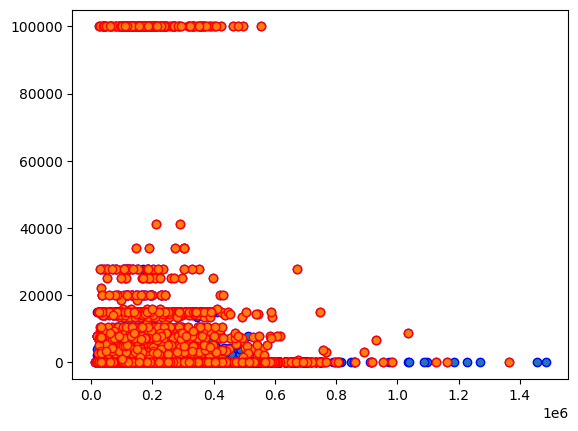

In [48]:
plt.scatter(df.iloc[:,2],df.iloc[:,9],edgecolor='blue')
plt.scatter(x[index,2],x[index,9],edgecolors='red')
plt.show()

In [49]:
# remove outliers
outliers = iso.fit_predict(df[['fnlwgt','capital_gain']])
df_cleaned = df[outliers == 1]  # Keep only inliers


In [50]:
outliers

array([ 1,  1,  1, ...,  1,  1, -1])

In [51]:
df_cleaned

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,income_ >50K,education_level,family_workload,capital_gain_log
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,1,0,0,0,7.684784
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,1,0,0,0,0.000000
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,1,0,2,0,0.000000
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,1,0,1,0,0.000000
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,0,0,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,22,4,310152,15,10,4,11,1,4,0,0,40,39,1,0,2,0,0.000000
32556,27,4,257302,7,12,2,13,5,4,0,0,38,39,0,0,2,0,0.000000
32557,40,4,154374,11,9,2,7,0,4,0,0,40,39,1,1,2,0,0.000000
32558,58,4,151910,11,9,6,1,4,4,0,0,40,39,0,0,2,0,0.000000


In [52]:
#. Discuss how outliers can affect model performance.
# Outliers can skew the results, especially for algorithms sensitive to scale.
# Removing them may improve model performance.

In [53]:
# PPS (Predictive Power Score) to find and discuss the relationships between features

In [54]:
! pip install ppscore

In [55]:
import ppscore as pps

In [63]:
# pps matrix
pps_matrix=pps.matrix(df)

In [64]:
pps_matrix

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,age,age,1.0,predict_itself,True,None,0.0000,1.000000,None
1,age,workclass,0.0,regression,True,mean absolute error,0.7426,0.875681,DecisionTreeRegressor()
2,age,fnlwgt,0.0,regression,True,mean absolute error,75872.1862,77535.141544,DecisionTreeRegressor()
3,age,education,0.0,regression,True,mean absolute error,2.7590,2.806164,DecisionTreeRegressor()
4,age,education_num,0.0,regression,True,mean absolute error,1.8530,1.898306,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
319,capital_gain_log,sex_ Male,0.0,regression,True,mean absolute error,0.3360,0.441472,DecisionTreeRegressor()
320,capital_gain_log,income_ >50K,0.0,regression,True,mean absolute error,0.2424,0.305052,DecisionTreeRegressor()
321,capital_gain_log,education_level,0.0,regression,True,mean absolute error,0.6148,0.750052,DecisionTreeRegressor()
322,capital_gain_log,family_workload,0.0,target_is_constant,True,None,1.0000,1.000000,None


In [58]:
#correlation matrix
corr=df.corr()

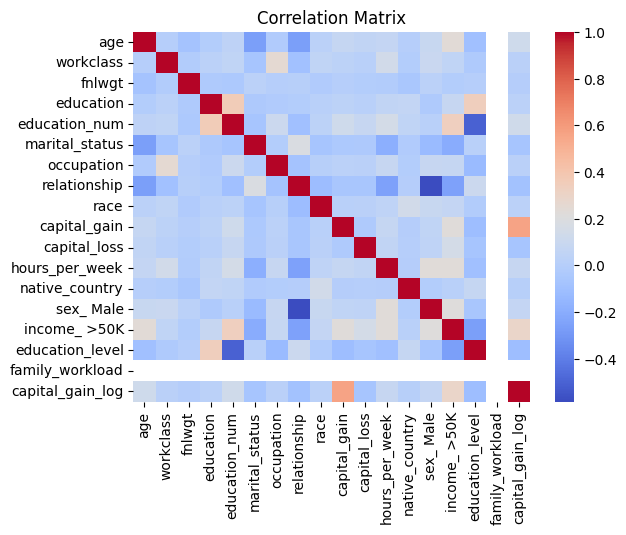

In [62]:
sns.heatmap(corr,annot=False,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [60]:
# PPS differs from correlation as it captures non-linear relationships, which correlation cannot detect. It offers a more robust insight into predictive relationships.